In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import os
#import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load in Dataset Of Random Species

In [2]:
def  genereate_df_from_embeddings(file_path, species):
    size = 0
    data = np.matrix(np.arange(424))
    entries = os.scandir(file_path)#'./output/Caryothraustes')
    for entry in entries:
        try:
            if (entry.is_file()):
                path = entry.path
                f = open(path, "r", encoding="cp1252", errors='ignore')
                embedding = f.read().strip().split("\n")
                name = entry.name
                for em in embedding:
                    em = em.strip().split(",")
                    em_times = em.pop(0).split("\t")
                    em.insert(0, em_times[2])
                    em.insert(0, em_times[1])
                    em.insert(0, em_times[0])
                    em = [float(i) for i in em]
                    
                    em.insert(0, species)
                    em.insert(0, name.split(".")[0])

                    #if (data == None):
                    #    data = np.matrix(np.arange(len(em)))
                    #    size = len(em)
                    data = np.append(data, [em],axis=0)
        except Exception as e:
            print("issue with ", entry.name, e)
    data = np.delete(data, 0, 0)
    return pd.DataFrame(data = data, columns=np.append(["name", "species", "start", "end"], np.arange(420)))

Caryothraustes = genereate_df_from_embeddings('./output/Caryothraustes', "Caryothraustes canadensis")

In [3]:
file_paths = ['./output/Caryothraustes', './output/Lipaugus', './output/Anthus crenatus','./output/Hirundo aethiopica', './output/Mulleripicus pulverulentus']
species = ["Caryothraustes canadensis",  "Lipaugus vociferans", "Anthus crenatus", "Hirundo aethiopica", "Mulleripicus pulverulentus"]
df_list = []

for i in range(0, len(species)):
    df = genereate_df_from_embeddings(file_paths[i], species[i])
    df_list.append(df)
df_list
embeddings_df = pd.concat(df_list)

In [4]:
for i in range(420):
    embeddings_df[str(i)] = pd.to_numeric(embeddings_df[str(i)])

In [5]:
def get_species_label(animal):
    return species.index(animal)

In [6]:
cluster_data = embeddings_df.get( map(str, np.append(range(0,420), "species"))).assign(species=embeddings_df.get("species").apply(get_species_label))

In [7]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
281,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
282,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
283,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


# Do centeroid distance predictions

In [8]:
import scipy

In [9]:
def compute_centeroid(df, cluster):
    df = df[df.get("species") == cluster].drop(columns=["species"])
    return df.sum(axis=0)/df.shape[0]

Split Data

In [10]:
cleaned_cluster_data = cluster_data.reset_index().drop(columns=["index"])
test = cleaned_cluster_data.sample(int(cleaned_cluster_data.shape[0] * 0.1)).sort_index(axis = 0)
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
5,0.556996,1.048566,0.242281,0.658880,1.097543,1.128642,0.471925,1.409862,0.499686,1.011936,...,0.430917,0.132071,0.852464,0.291321,2.252734,1.546174,2.445083,1.224913,0.311717,0
13,0.339859,1.387449,0.690197,0.805026,0.740122,0.640077,1.017623,1.029475,0.481024,1.330790,...,0.428495,0.651343,0.944580,1.561310,0.859710,1.225569,0.708027,0.752095,0.442302,0
45,0.705439,0.906357,0.362284,0.921396,0.744424,1.147455,1.155112,1.164926,0.538833,0.818053,...,0.451770,0.499867,0.250285,0.463207,0.784842,0.639580,0.319976,0.763773,0.522244,0
46,0.687420,0.795740,0.948886,0.717699,0.408082,0.923810,1.868652,0.290231,1.254686,0.838038,...,0.827081,0.253189,0.292439,1.506352,1.150848,0.662427,0.623149,0.716684,0.483842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377,0.924808,1.546041,0.671640,1.041090,0.075332,0.082186,1.007944,0.241225,0.918729,0.753096,...,0.364755,0.749798,0.062276,0.759176,0.686636,1.053746,0.980944,1.399143,0.529953,4
7390,0.729846,0.825675,0.720865,0.794070,0.604183,0.475604,1.593962,0.195593,0.808757,0.800357,...,0.473281,1.124917,0.033725,0.564893,0.479913,0.511770,0.519277,1.376051,0.727765,4
7413,0.490414,0.523719,0.178769,0.638885,0.260433,0.676320,0.724569,0.379080,1.037414,0.933868,...,0.029995,0.390276,0.215677,0.650234,0.233190,1.032751,0.844676,0.914624,0.113741,4
7428,0.610810,0.754974,0.737093,0.211021,1.006864,0.998171,0.435184,0.610056,0.618775,0.806436,...,0.354238,0.659481,0.154156,1.295195,0.537993,0.536578,0.657119,0.627567,0.603839,4


In [11]:
train = cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
train

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
6,0.555536,0.341442,0.143662,0.895786,0.685314,1.126376,0.974429,1.725527,0.646137,0.755939,...,0.261124,0.571639,0.126372,0.860797,1.324912,1.489001,1.470830,0.404725,0.139849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430,0.971101,0.666560,0.884114,0.245578,1.063932,0.865253,0.812836,0.322590,0.501752,0.769390,...,0.435174,0.389039,0.077188,1.138001,0.481677,0.575330,0.545785,0.531589,0.470088,4
7431,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
7432,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
7434,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


generate a list of centeroids for each species in training data set

In [27]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(train, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
centeroids    

array([[0.50465872, 0.64079827, 0.50953024, ..., 0.82829849, 0.52172515,
        0.67202212],
       [0.57104534, 0.4417757 , 0.60852054, ..., 1.35065726, 0.62583999,
        0.54432226],
       [0.80676848, 0.65256737, 1.16475535, ..., 0.64095564, 0.74685637,
        0.73876186],
       [0.67991658, 0.57849706, 1.05499206, ..., 0.44657682, 0.81256454,
        0.61444841],
       [0.53805919, 0.95422946, 0.50806227, ..., 0.74260951, 0.69318134,
        0.61654227]])

Based on training centeroids, attempt to predict species labels of testing dataset

In [13]:
#get_dist_train = train.reset_index().drop(columns=["index", "species"])
#dist_matrix_train = scipy.spatial.distance_matrix(get_dist_train.to_numpy(dtype=float),centeroids)

get_dist_test = test.reset_index().drop(columns=["index", "species"])
dist_matrix_test = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)

In [14]:
len(get_dist_test)

743

In [15]:
def create_species_predictions(dist_matrix):
    species_predicted = np.array([])
    for i in range(len(dist_matrix)):
        species_predicted = np.append(species_predicted, np.where(dist_matrix[i] == min(dist_matrix[i])))
    return species_predicted

species_predicted = create_species_predictions(dist_matrix_test)
species_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 3., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [16]:
len(species_predicted)

743

Assign these predicted species to test dataset

In [17]:
centeroid_work = test.assign(species_predicted=species_predicted).get(["species", "species_predicted"])
centeroid_work

,species,species_predicted
2,0,0.0
5,0,0.0
13,0,0.0
45,0,0.0
46,0,0.0
...,...,...
7377,4,4.0
7390,4,4.0
7413,4,4.0
7428,4,4.0


In [18]:
false_positives = centeroid_work[centeroid_work.species != centeroid_work.species_predicted]
false_positives

,species,species_predicted
116,0,3.0
221,0,3.0
222,0,1.0
225,0,1.0
240,0,1.0
...,...,...
7219,4,3.0
7269,4,3.0
7311,4,3.0
7326,4,3.0


Proportions of incorrectly labeled data

In [19]:
false_positives.shape[0]/centeroid_work.shape[0]

0.10901749663526245

====================================================

In [20]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(cleaned_cluster_data, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
get_dist_test = cluster_data.drop(columns=["species"])
dist_matrix_all = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)
species_predicted = create_species_predictions(dist_matrix_all)
species_predicted

array([0., 0., 0., ..., 4., 4., 4.])

# Visualizations

In [21]:
pca = PCA(n_components = 3) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings_df.get( map(str, range(0,420))))

pd.DataFrame(pca.components_.T)
X_train_pc
pca_embeddings = pd.DataFrame(data={"cluster": species_predicted, "species": list(embeddings_df.get("species").apply(get_species_label))})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["species_predicted", "species", "x", "y", "z"]
#pca_embeddings = pca_embeddings.assign(species=embeddings_df.get("species"))
pca_embeddings

,species_predicted,species,x,y,z
0,0.0,0,2.919044,-0.199620,3.432051
1,0.0,0,2.832059,0.597257,3.707333
2,0.0,0,4.466963,0.010910,4.189626
3,0.0,0,2.231342,-0.303444,3.319985
4,0.0,0,2.430436,-0.125230,2.824668
...,...,...,...,...,...
7431,4.0,4,1.836399,1.619820,2.354116
7432,4.0,4,1.661936,0.337690,3.517885
7433,4.0,4,0.581084,1.310063,2.584419
7434,4.0,4,-3.126807,1.663887,1.818594


## Species Predicted In Test Sample

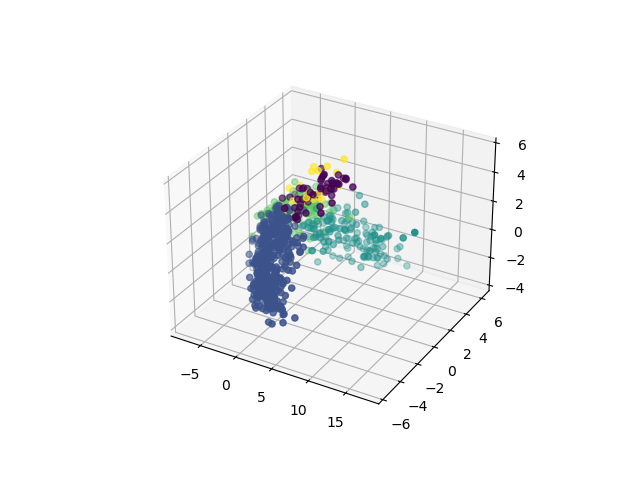

In [22]:
#cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Actual Species In Test Sample

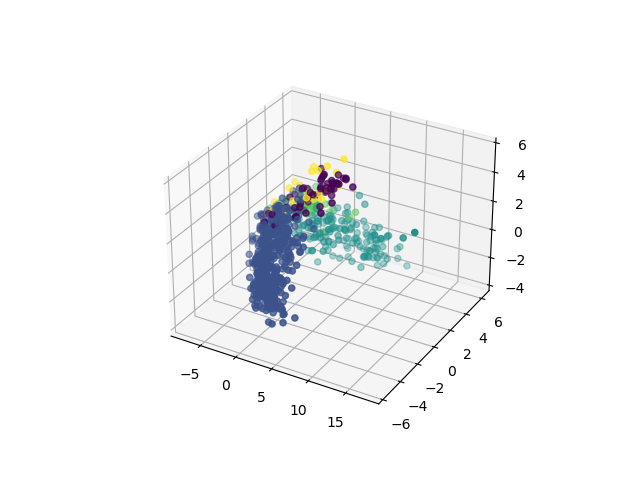

In [23]:
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

## Species Predicted != Species Labels in Test Sample

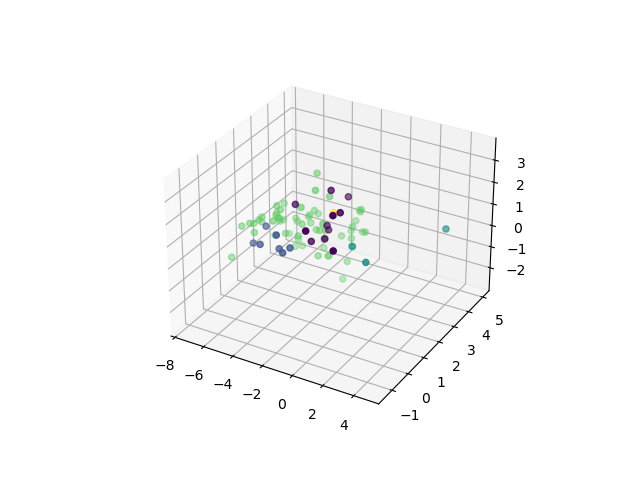

In [24]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species != pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Species Predicted == Species Labels

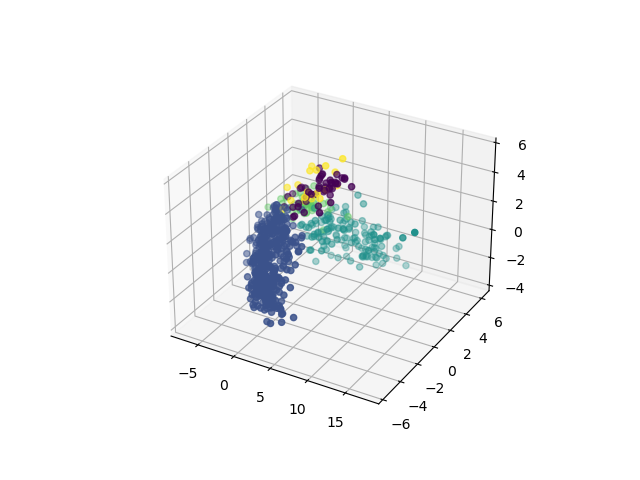

In [25]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species == pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

All Data Again


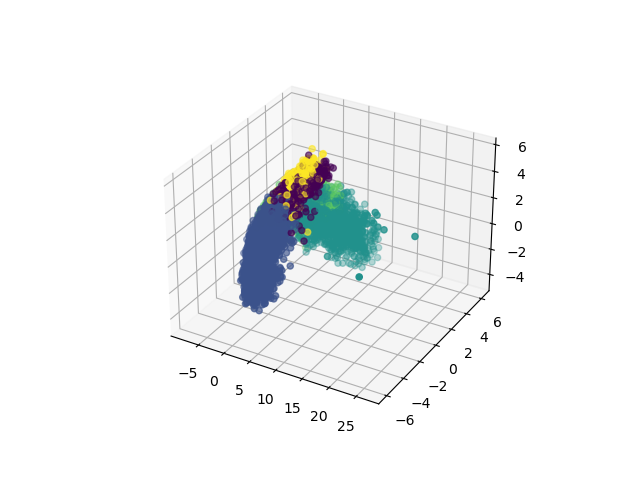

In [26]:
embeddings_to_plot = pca_embeddings
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

# Conclusion?

- Promsing sign we can use simple centorids to expand birdnet's ablity without needing to retrain birdnet
- When birds cluster together, it may confuse this algorithm